In [3]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# import penguin data from seaborn
data = sns.load_dataset('penguins')
data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 344 rows and 7 columns


In [11]:
# check for null values
print(data.isnull().sum())
print(round(data.isnull().mean()*100,2)) #percentage of null values (no of null values/no of datapoints(rows)*100)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0.00
island               0.00
bill_length_mm       0.58
bill_depth_mm        0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  3.20
dtype: float64


In [12]:
# removing the missing values
data.dropna(inplace= True)

#percnetage missing value after removing it
round(data.isnull().mean()*100,2)


,0
species,0.0
island,0.0
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


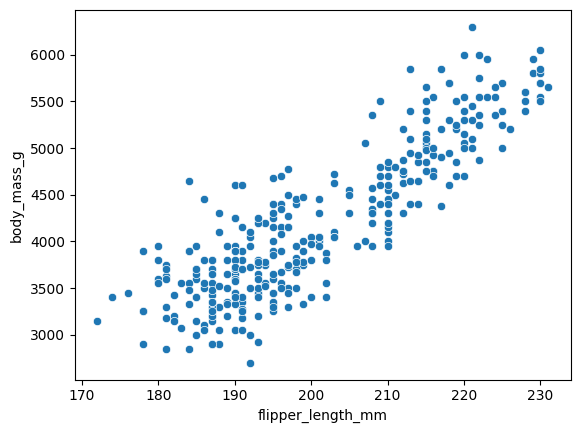

In [15]:
# scatterplot between two numerical variables
sns.scatterplot(x = 'flipper_length_mm',
                y= 'body_mass_g',
                data = data)
plt.show()

In [17]:
# correlation coeff values
#  var = data['x'].corr(data['y'])
correlation = data['flipper_length_mm'].corr(data['body_mass_g'])
print(round(correlation,2)) #shows strong positive correlation

0.87


In [20]:
# correlation coeff for the entire dataframe
round(data.corr(numeric_only = True),2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


In [22]:
# list of color maps from matplotlib
from matplotlib import colormaps
print(list(colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

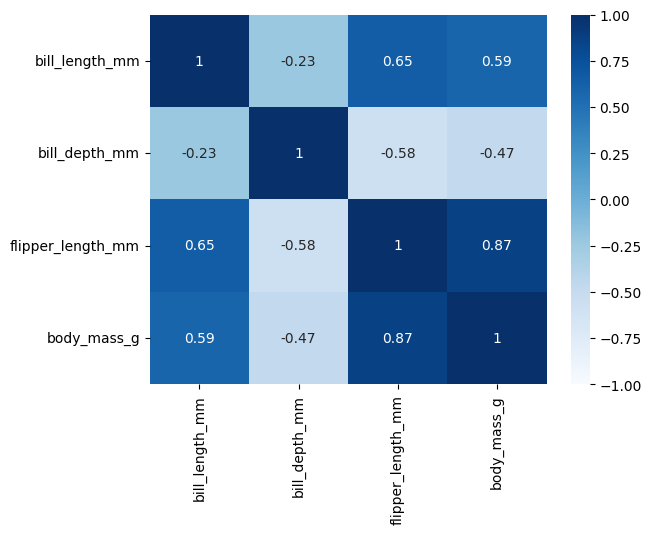

In [24]:
# create a heatmap for easy correlation visualisation
sns.heatmap(data.corr(numeric_only = True),
            annot = True,
            cmap = 'Blues',
            vmin = -1, vmax=1)
plt.show()

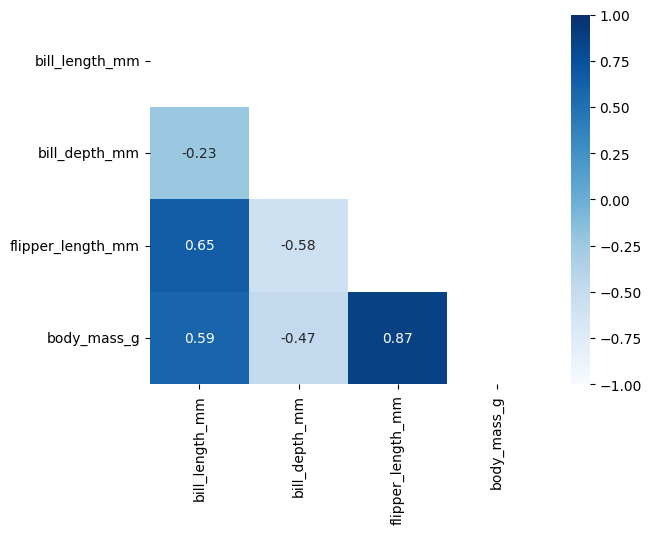

In [25]:
#correlation of data with only lower half
cor = data.corr(numeric_only = True)
upper = np.triu(cor)

#heatmap with lowerhalf
sns.heatmap(cor,
            vmin = -1, vmax = 1,
            annot = True,
            cmap = 'Blues',
            mask = upper)
plt.show()